# *Heart Disease Prediction Using the K-Nearest Neighbours Algorithm*

Group 31:
Vansh Sidhu (63883342),
Aaron Yang (63331953),
Markus Westenenk (48027031),
Gabriel-Henri Martin (18564575)


## Introduction

Heart disease, a range of conditions that affect the heart, is a leading cause of morbidity and mortality globally, accounting for an estimated 18 million deaths annually (Mattingly, 2021). Given its prevalence within the global population, it’s important that healthcare workers are equipped with adequate tools and knowledge to diagnose these conditions. 

A skilled healthcare professional, though able to properly diagnose an individual through consultation, can only evaluate one at a time. It is an equally slow and tedious process. In order to facilitate their lives and allow them to work on more urgent cases, we will develop an algorithm to accurately assess and diagnose patients who may be at risk. 

Cleveland's database on heart disease, provided by the UCI Machine Learning Repository, has a total of 14 subsets (variables), which may or may not indicate an increased chance of heart disease (Janosi et. al, 1989). These variables range from physical condition (age, cholesterol, blood pressure, and heart rate) to physical attributes (sex and age). For the sake of this project, we will try to predict the heart disease diagnosis of a person based on their age, cholesterol levels, and resting blood pressure using the k-nearest neighbor algorithm.

### Variable information:

**age**: age in years 

**sex**: sex (1 = male; 0 = female) 

**cp**: chest pain type 
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic
  
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
  
**chol**: serum cholesterol in mg/dl 

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

**restecg**: resting electrocardiographic results 
- Value 0: normal 
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  
**thalach**: maximum heart rate achieved
  
**exang**: exercise induced angina (1 = yes; 0 = no) 

**oldpeak** = ST depression induced by exercise relative to rest 

**slope**: the slope of the peak exercise ST segment 
- Value 1: upsloping 
- Value 2: flat 
- Value 3: downsloping
  
**ca**: number of major vessels (0-3) colored by flourosopy
  
**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect 

**num**: diagnosis of heart disease (angiographic disease status) 
- Value 0: < 50% diameter narrowing in any major vessel
- Value 1~4: > 50% diameter narrowing in any major vessel

## *Methods & Results* 

### Methods used to perform the analysis 
Firstly, we load the necessary packages for the analysis. Then, we read the heart disease data from a GitHub URL that we uploaded the dataset to. To turn our data into a tidy format, we rename the variables and ensure that the data types match those stated in the online source of the data set. Given that we're conducting classification, the response variable has to be of factor type. Thus, we create a new variable named "diagnosis," representing whether the individual has heart disease (TRUE) or not (FALSE). 


After cleaning the data, we split 75% of the data into training data and the rest into testing data, with roughly an equal proportion of TRUE and FALSE diagnosis in each set. Additinally, we made sure to set a seed so our analysis is reproducible, this is because the "initial_split" function uses randomness. Next, we perform a 5-fold cross-validation on around 33 different K values, ranging from K=1 to K=100, and pick the K value that provides the highest estimated accuracy on the validation set and doesn't overfit or underfit the data. Finally, we will build a new classifier using this best K value and evaluate the accuracy, precision, and recall of our model on the testing set.

To visualize our analysis, we created a bar plot that shows the proportion of each category that was correctly or incorrectly predicted by our classifier.

In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://raw.githubusercontent.com/r0nYang/Storage-for-dataset/main/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = FALSE)
colnames(heart_disease) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                            "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease_converted <- heart_disease |>
                        mutate(age = as.integer(age), sex = as_factor(sex), cp = as_factor(cp), 
                               trestbps = as.integer(trestbps), chol = as.integer(chol), 
                               fbs = as_factor(fbs), restecg = as_factor(restecg), thalach = as.integer(thalach), 
                               exang = as_factor(exang), oldpeak = as.integer(oldpeak), slope = as_factor(slope), 
                               ca = as.integer(ca), thal = as_factor(thal), num = as.integer(num))
head(heart_disease_converted)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0


Table 1. Tidied Heart Disease Dataset.

In [3]:
heart_disease_mutated <- heart_disease_converted |>
                        mutate(diagnosis = case_when(num >= 1 ~ TRUE, num == 0 ~ FALSE)) |>
                        mutate(diagnosis = as_factor(diagnosis))
tail(heart_disease_mutated)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
57,0,4,140,241,0,0,123,1,0,2,0,7.0,1,TRUE
45,1,1,110,264,0,0,132,0,1,2,0,7.0,1,TRUE
68,1,4,144,193,1,0,141,0,3,2,2,7.0,2,TRUE
57,1,4,130,131,0,0,115,1,1,2,1,7.0,3,TRUE
57,0,2,130,236,0,2,174,0,0,2,1,3.0,1,TRUE
38,1,3,138,175,0,0,173,0,0,1,NA,3.0,0,FALSE


Table 2. Tidied Heart Disease Dataset with a newly added response variable.

The variable num represents if a patient is diagnosed with heart disease (value 1~4) or is absence of it (value 0). As we're using the K-nn algorithm for classification to predict a patient's diagnosis, the response variable needs to be a factor. Therefore, we created a new variable "diagnosis" which represents if a person is diagnosed with heart disease or not depending on the value of the variable "num".

### Data summary of the training data

In [4]:
set.seed(123)
heart_disease_split <- initial_split(heart_disease_mutated, prop = 0.75, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [5]:
nrow(filter(heart_disease_train, is.na(age) | is.na(trestbps) | is.na(chol) | is.na(diagnosis)))

[1] 0

The age, trestbps, diagnosis, and chol variables have no missing values in the training set.

In [6]:
group_by(heart_disease_train, diagnosis) |>
summarize(count= n(), percent = 100*count/nrow(heart_disease_train), avg_chol = mean(chol), median_chol = median(chol), avg_age = mean(age), avg_trestbps = mean(trestbps))

diagnosis,count,percent,avg_chol,median_chol,avg_age,avg_trestbps
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,123,54.18502,243.5691,235.0,52.94309,128.6504
TRUE,104,45.81498,250.6058,253.5,55.83654,135.9808


Table 3. Summary of Training Set.

As shown in the table above, the proportion of individuals with and without heart disease in the training set is roughly equal. Within these two groups, it can be observed that those diagnosed with heart disease tend to have a higher average in cholesterol level, age, and resting blood pressure.

### Preliminary data visualization

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


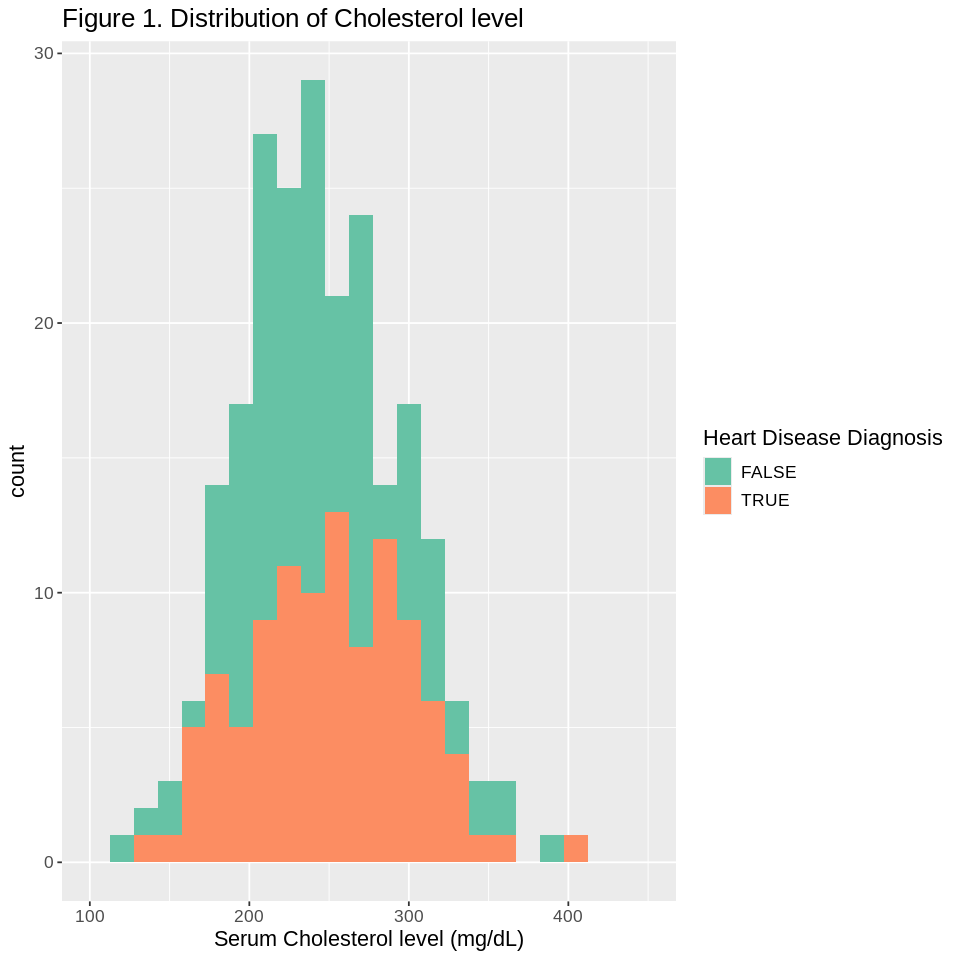

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

chol_distribution <- heart_disease_train |>
                    ggplot(aes(x=chol, fill=diagnosis)) +
                    geom_histogram(position="stack", binwidth=15) +
                    labs(x="Serum Cholesterol level (mg/dL)", fill = "Heart Disease Diagnosis", title = "Figure 1. Distribution of Cholesterol level") +
                    xlim(100,450) +
                    scale_fill_brewer(palette = "Set2") +
                    theme(text= element_text(size=13))
chol_distribution

The distribution graph of serum cholesterol levels shows that individuals with cholesterol levels of around 290 mg/dL are more likely to have heart disease, while those with lower than 270 mg/dL cholesterol level are more likely to be free of it. Beyond the 330 mg/dL mark, there seems to be an equal number of individuals who have tested positive for heart disease as those who have tested negative. Therefore, this graph shows a slight relationship between heart disease risk and specific cholesterol levels, particularly within certain ranges. Specifically, lower cholesterol level corresponds to higher chance of negative diagnosis of heart disease, while those with medium high cholesterol level corresponds to higher chance of positive diagnosis.

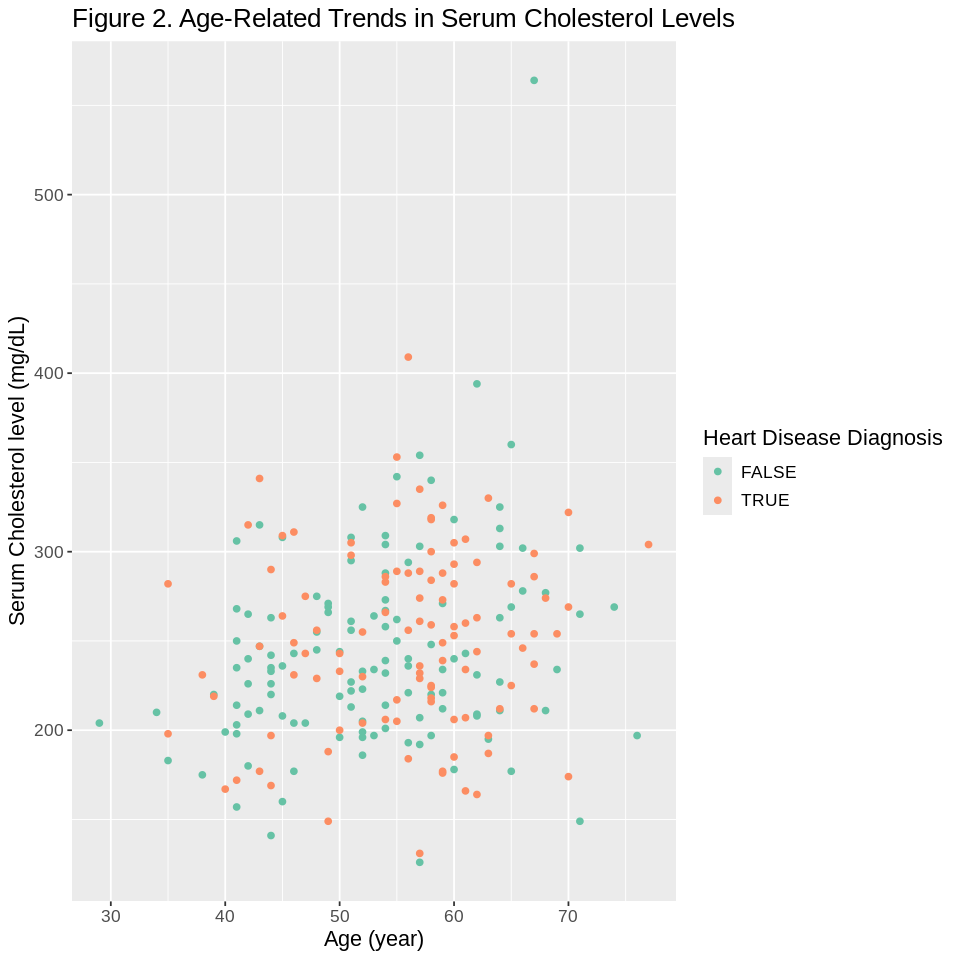

In [8]:
chol_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=chol,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Serum Cholesterol level (mg/dL)", colour = "Heart Disease Diagnosis", title = "Figure 2. Age-Related Trends in Serum Cholesterol Levels") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13)) 
chol_vs_age_plot

The above scatterplot graph doesn't display an obvious trend among cholesterol level, age, and heart disease diagnosis. However, there is a slight relation between age and heart disease diagnosis as there's a greater proportion of older individuals who have tested positive for heart disease compared to those who are free of it.

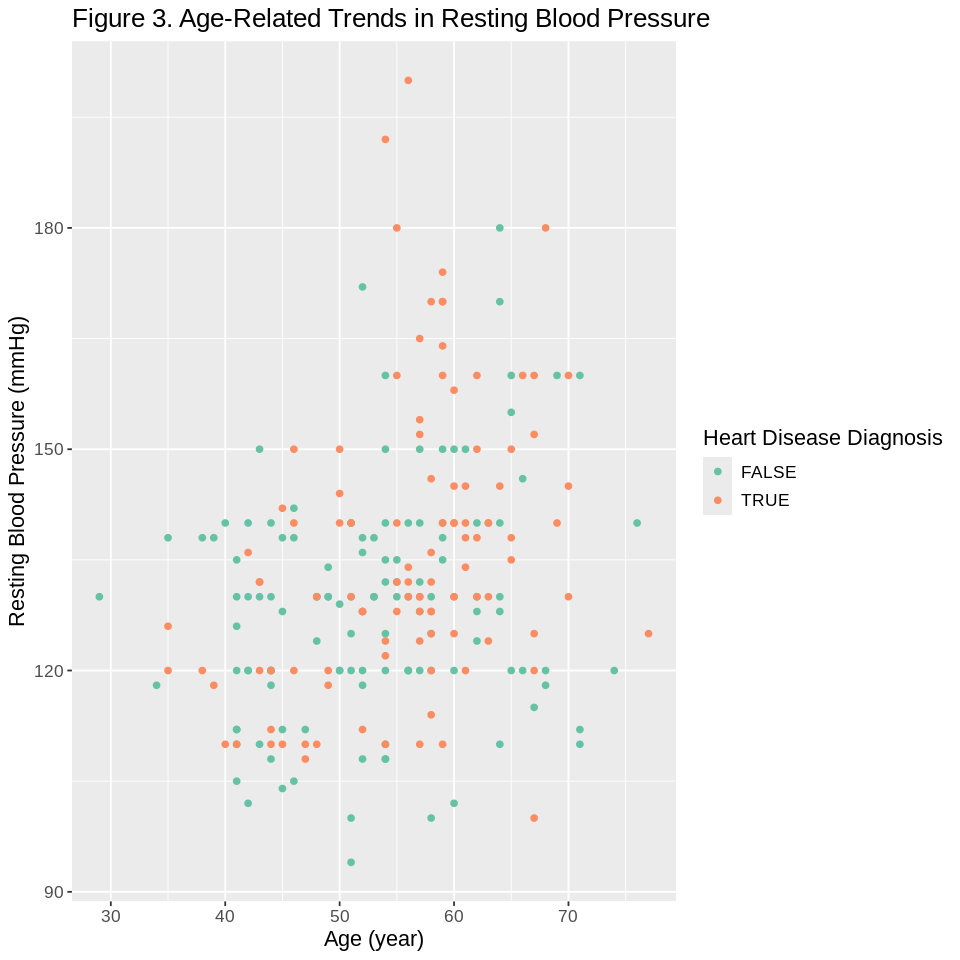

In [9]:
trestbps_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=trestbps,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Resting Blood Pressure (mmHg)", colour = "Heart Disease Diagnosis", title = "Figure 3. Age-Related Trends in Resting Blood Pressure") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13))
trestbps_vs_age_plot

This graph compares age and resting blood pressure levels and includes “true” and “false” diagnoses for heart disease at all ages and blood pressure levels. It is shown that individuals with higher resting blood pressure and older age is more likely to diagnose positive for heart disease. Therefore, there is a slight trend between age, resting blood pressure, and heart disease diagnosis, which becomes more apparent as the values of age and resting blood pressure are high.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


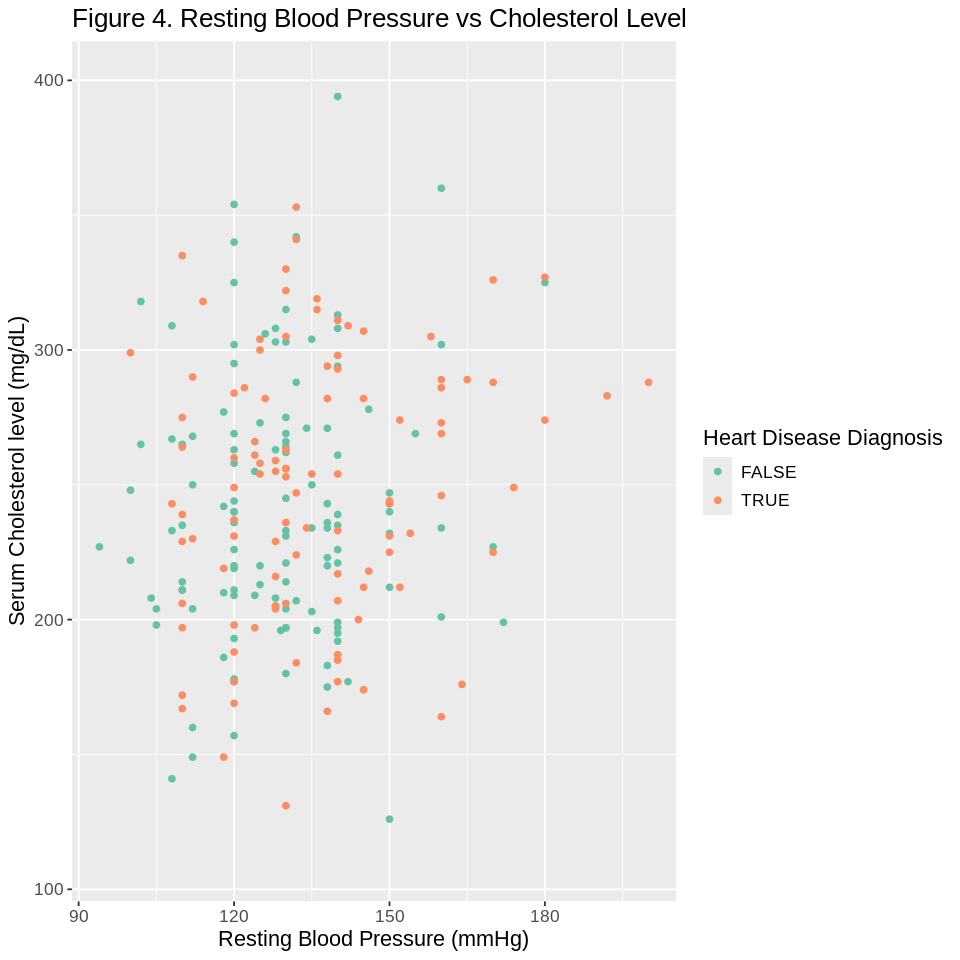

In [10]:
trestbps_vs_chol_plot <- heart_disease_train |>
                ggplot(aes(x=trestbps, y=chol, colour=diagnosis)) +
                geom_point() +
                labs(x="Resting Blood Pressure (mmHg)", y="Serum Cholesterol level (mg/dL)", colour = "Heart Disease Diagnosis", title = "Figure 4. Resting Blood Pressure vs Cholesterol Level") +
                scale_colour_brewer(palette = "Set2") +
                ylim(110,400) +
                theme(text= element_text(size=13))
trestbps_vs_chol_plot

This graph compares resting blood pressure and serum cholesterol levels and includes “true” and “false” diagnoses for heart disease at all resting blood pressure and cholesterol levels. Also, there is no clear trend indicating that cholesterol levels increase or decrease with resting blood pressure. Additionally, we observe no direct link for whether an individual has heart disease or not based on these factors.

### Performing the data analysis

In [11]:
set.seed(123)
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

k_vals <- tibble(neighbors = seq(from=1, to=100, by=3))
                 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_disease_recipe <- recipe(diagnosis ~ trestbps + chol + age, data = heart_disease_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_fit <- workflow() |>
        add_recipe(heart_disease_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = heart_disease_vfold, grid = k_vals)

knn_result <- knn_fit |>
            collect_metrics() |>
            filter(.metric=="accuracy") |>
            arrange(desc(mean))
slice(knn_result, 1:3)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
76,accuracy,binary,0.6261265,5,0.02679542,Preprocessor1_Model26
70,accuracy,binary,0.6218797,5,0.03185201,Preprocessor1_Model24
19,accuracy,binary,0.6216820,5,0.02263299,Preprocessor1_Model07


Table 4. Top 3 K-values with the highest estimated accuracy.

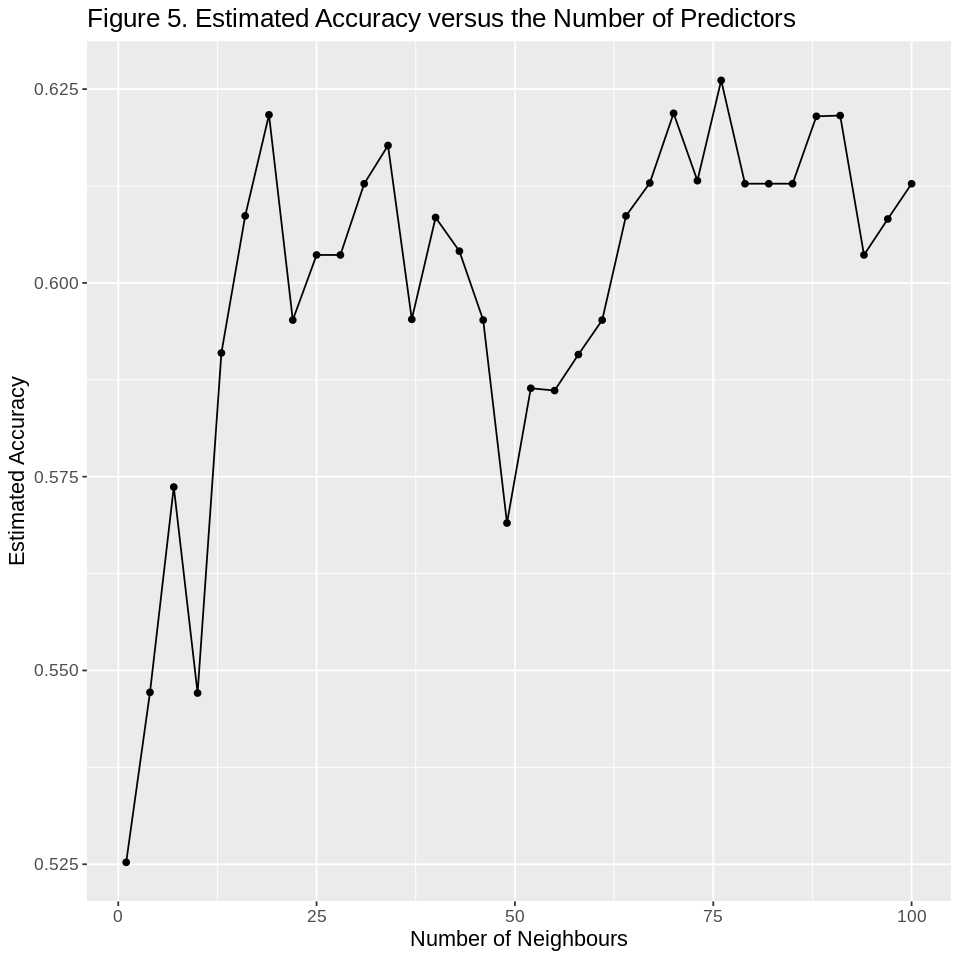

In [12]:
knn_plot <- knn_result |>
        ggplot(aes(x=neighbors,y=mean)) +
        geom_point() +
        geom_line() +
        labs(x="Number of Neighbours",y="Estimated Accuracy", title = "Figure 5. Estimated Accuracy versus the Number of Predictors") +
        theme(text = element_text(size=13))
knn_plot

Looking at table 4 and figure 5, the K values 19, 70, and 76 have very minimum difference in accuracy despite substantial differences in their respective K values. Since the training dataset consists of 227 observations, a K value of 70 and 76 would be slighty high, and could lead to underfitting as the classifier would not be influenced enough by the training set. Therefore, we will pick K=19 as our best K value.

We will then build a new classifier using this best K value and  evaluate it by checking its accuracy, precision, and recall on the testing set.

In [13]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
                set_engine("kknn") |>
                set_mode("classification")

knn_best_fit <- workflow() |>
            add_model(knn_spec_best) |>
            add_recipe(heart_disease_recipe) |>
            fit(data = heart_disease_train)

test_predictions <- predict(knn_best_fit, heart_disease_test) |>
                        bind_cols(heart_disease_test)
head(test_predictions)

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
TRUE,63,1,1,145,233,1,2,150,0,2,3,0,6.0,0,FALSE
FALSE,67,1,4,120,229,0,2,129,1,2,2,2,7.0,1,TRUE
FALSE,37,1,3,130,250,0,0,187,0,3,3,0,3.0,0,FALSE
FALSE,41,0,2,130,204,0,2,172,0,1,1,0,3.0,0,FALSE
TRUE,62,0,4,140,268,0,2,160,0,3,3,2,3.0,3,TRUE
TRUE,63,1,4,130,254,0,2,147,0,1,2,1,7.0,2,TRUE


Table 5. Predicted Labels Binded to the Testing Set .

In [14]:
test_predictions |> pull(diagnosis) |> levels()

[1] "FALSE" "TRUE"

Checking the order of the labels in the "diagnosis" variable, we observe that "TRUE", our "positive" label, is the second level. Hence, we specify 'event_level = "second"' when using the recall and precision function.

In [15]:
predictions_recall <- test_predictions |>
                    recall(truth=diagnosis,estimate=.pred_class, event_level = "second")

predictions_accuracy <- test_predictions |>
                    metrics(truth=diagnosis,estimate=.pred_class) |>
                    filter(.metric == "accuracy")

predictions_precision <- test_predictions |>
                    precision(truth=diagnosis,estimate=.pred_class, event_level = "second")

merge_metrics <- bind_rows(predictions_recall, predictions_accuracy, predictions_precision)
merge_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5142857
accuracy,binary,0.6052632
precision,binary,0.5806452


Table 6. Metrics of the classifier.

In the above table, we observe that when we evaluate our classifier using the testing set, it has a recall of 51.4%, accuracy of 60.5%, and precision of 58%.

### Visualization of analysis

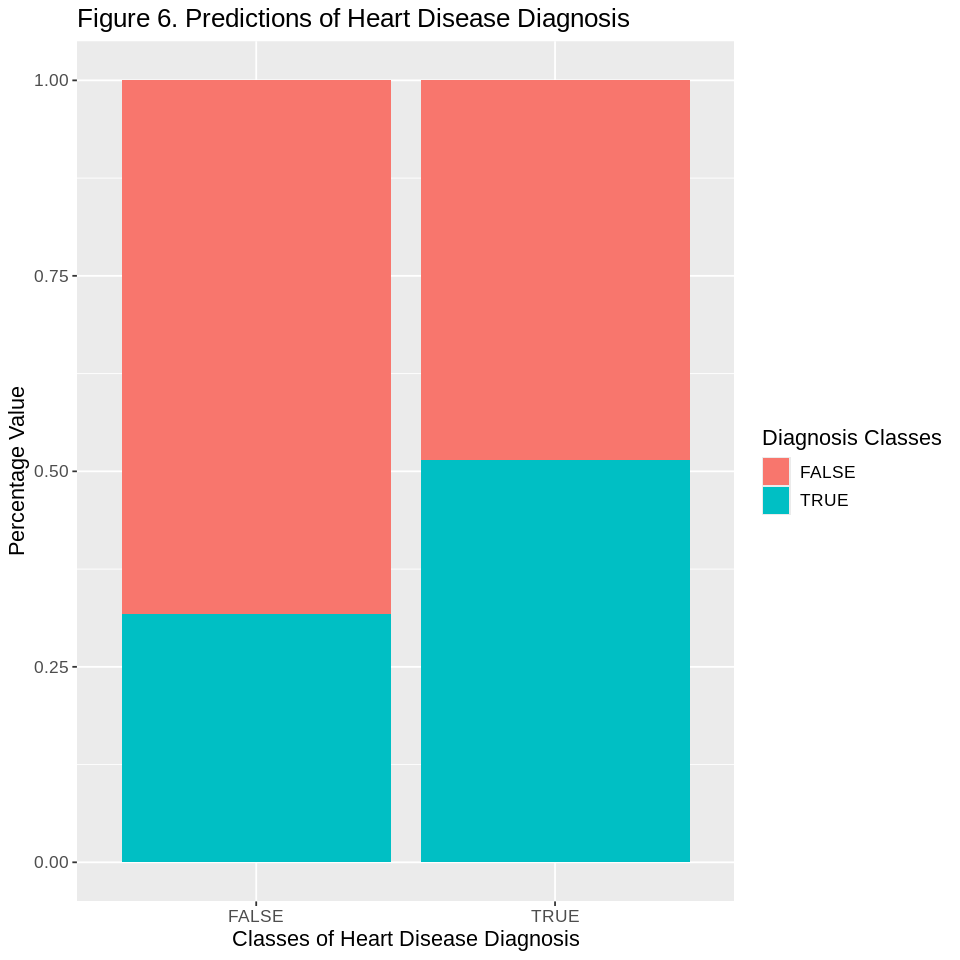

In [16]:
proportion_predicted <- test_predictions |>
                    ggplot(aes(x=diagnosis,fill=.pred_class)) +
                    geom_bar(stat="count",position="fill") +
                    labs(x="Classes of Heart Disease Diagnosis", 
                         y="Percentage Value",
                         title="Figure 6. Predictions of Heart Disease Diagnosis",
                         fill="Diagnosis Classes") +
                    theme(text= element_text(size=13))
proportion_predicted

We observe that our classifier is better at correctly predicting "FALSE" diagnosis as compared to the "TRUE" diagnosis. It is also concerning that the classifier correctly predicts only half of the positive diagnosis. This is terrible in the context of predicting the diagnosis of heart disease as a false negative can be extremely dangerous; a person with life-threantening disease may not receive proper attention and treatments.

## *Discussion*

- We found that our k-nearest-neighbor classifier had not been nearly good enough to act as a reliable way of diagnosing heart disease in patients given a recall value of 51.4% and a precision of 58%. When testing for something as serious as heart disease, it is important that no patient falls between the crevices of faulty diagnoses, particularly in the instance of a false negative. For this reason, the recall of our classifier must be as high as possible along with a precision that is reasonable to consider our classifier a success. Therefore, our classifier did not meet our expectations and shouldn't be used in healthcare settings. 

- Having done some previous research on heart disease and influencing factors before embarking on this project, we certainly were not expecting these results. According to a litany of sources, more specifically the national institute of health and the center for disease control, factors such as age, high cholesterol, and elevated resting blood pressure all increase the risk of heart disease in a given patient. When analyzing the data, though certain factors show an incredibly weak trend, it is not clear when analyzing the dataset that these factors, which have been extensively researched, have an influence on the risk of contracting heart disease. The idea that all the papers written on the subject are wrong seems less plausible than the idea that the classifier is functioning on a dataset that is either skewed or has too small of a sample size. 

- Although our classifier didn't perform as well as we had hoped, it can still be used as a basis for future classifier if we wish to test out different predictor variables or if we have the opportunity to work with a larger dataset.

- It’s important to reiterate that the dataset this model was built and tested on had only 303 samples, which is to say, quite small. Hence, it would be interesting to see the outcome of an identical project with a much larger dataset; perhaps there could have been a more clear trend between our predictor variables and the response variable. If the results from this proceeding classifier are similar, then it would be important to test the other variables found in the dataset and see if they yield a more visible trend.

## Citations

- Quinn Mattingly. (2021, June 11). Cardiovascular Diseases. WHO. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
- Manolio, T. A., Pearson, T. A., Wenger, N. K., Barrett-Connor, E., Payne, G. H., & Harlan, W. R. (1992). Cholesterol and heart disease in older persons and women review of an NHLBI workshop. Annals of Epidemiology, 2(1), 161-176. https://doi.org/10.1016/1047-2797(92)90051-Q
- Andras Janosi, W. S. (1989). Heart Disease [dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X
- Heart health and aging | National Institute on Aging. Heart Health and Aging. (2018, June 1). https://www.nia.nih.gov/health/heart-health/heart-health-and-aging
- Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity